EDA Task for Automobile Dataset

This notebook will have the code used to prepare and clean the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read data
automobile_df = pd.read_csv("automobile.txt")
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We have consistently 205 values in each column so this means at the very least there are no null values. So we only need to check for junk values rather than both.

In [2]:
automobile_df.describe()    

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [3]:
#lets take a look at the data.
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


At the moment we're starting with a lot of data and no real pathway to where we want to get, so next we will look for useless or incorrect data. E.g. data that should be numeric and is not. *Number of doors should obviously be a numeric column, but the data is all in the form of a string name for the number (four or two) so we will treat this as a categoric variable and leave it as four or two for now.

In [4]:
numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'height', 'width',
                   'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
#these columns should be numeric looking at them logically, some of them are int64 or flaot64 but some of them are currently 'object' types.
print("Non-numeric values per column")
for column in numeric_columns:
    if (pd.to_numeric(automobile_df[column], errors='coerce').isnull().sum() > 0):
        print(column + ": " + str(pd.to_numeric(automobile_df[column], errors='coerce').isnull().sum()))

Non-numeric values per column
normalized-losses: 41
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


We could see when we opened the dataset that some of the normalized-losses values are '?' instead of the value they should be. So these need to be replaced. It would be really nice if all missing values were '?' so we can find them all at once. So I will check for this and then compare with the above.

In [5]:
column_list = list(automobile_df.columns)
for column in column_list:
    if '?' in automobile_df[column].value_counts():
        print(column + ": " + str(automobile_df[column].value_counts()['?']))

normalized-losses: 41
num-of-doors: 2
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


Normalized-losses has a concerning amount of '?' values (20% of total values) and will have to be checked. 

We will have to convert this column into numeric, because all values should be numbers. The '?' values are currently preventing this so we can replace all of those with NaN values.

We will then have to see if any manufacturer has a high amount of NaN values as we cannot anaylse the information they have if most of their cars have NaN values.

Price can also easily be changed into numeric format by removing the '?' as the values do not have currency symbols.

In [6]:
automobile_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
automobile_df = automobile_df.replace('?',np.NAN) 
automobile_df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

These NAN values match up with the numbers we collected for '?' previously. This would suggest that we have converted all of these into appropriate NAN values.  

In [8]:
#create a temporary df of all the non-null values in normalized losses.
temp_nl = automobile_df['normalized-losses'].loc[automobile_df['normalized-losses'] != np.NAN]
#average these values, i kept getting errors about adding strings and numbers, so using .astype(str).astype(float) fixed this. 
temp_nl_avg = temp_nl.astype(str).astype(float).mean()
#replace old values with new treated values.
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].replace(np.NAN, temp_nl_avg).astype(int)
automobile_df['normalized-losses'].isnull().sum()
#0 null values now.

0

In [9]:
#cleaning the price column. 
#start with the same system as losses.
#we know from before that 4 of the price values were '?' and are now NAN.
automobile_df['price'].loc[automobile_df['price'].isnull() == True]


9      NaN
44     NaN
45     NaN
129    NaN
Name: price, dtype: object

In [10]:
# we will set these to be the average price.
avg_price = automobile_df['price'].loc[automobile_df['price'] != np.NAN]
avg_price = avg_price.astype(float).mean()
automobile_df['price'] = automobile_df['price'].replace(np.NAN, avg_price).astype(int)
automobile_df['price'].isnull().sum()
automobile_df['price'].iloc[[9,44,45,129]]

9      13207
44     13207
45     13207
129    13207
Name: price, dtype: int32

In [11]:
#now horsepower
avg_hp = automobile_df['horsepower'].loc[automobile_df['horsepower'] != np.NAN]
avg_hp = avg_hp.astype(float).mean()
automobile_df['horsepower'] = automobile_df['horsepower'].replace(np.NAN, avg_hp).astype(int)
automobile_df['horsepower'].isnull().sum()

0

In [12]:
#check what we still need to clean.
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
automobile_df['bore'] = pd.to_numeric(automobile_df['bore'],errors='coerce')
automobile_df['stroke'] = pd.to_numeric(automobile_df['stroke'],errors='coerce')
automobile_df['peak-rpm'] = pd.to_numeric(automobile_df['peak-rpm'],errors='coerce')

In [14]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now our datatypes are all appropriate to the data they are trying to display and the majority of our non-values are cleaned. We have just a few null values left for some categories but these will not affect the EDA enough to need worrying about (largest gap in data is 1.9%).

In [15]:
avg_bore = automobile_df['bore'].loc[automobile_df['bore'] != np.NAN]
avg_bore = avg_bore.astype(float).mean()
automobile_df['bore'] = automobile_df['bore'].replace(np.NAN, avg_bore).astype(int)
automobile_df['bore'].isnull().sum()

0

In [16]:
avg_stroke = automobile_df['stroke'].loc[automobile_df['stroke'] != np.NAN]
avg_stroke = avg_stroke.astype(float).mean()
automobile_df['stroke'] = automobile_df['stroke'].replace(np.NAN, avg_stroke).astype(int)
automobile_df['stroke'].isnull().sum()

0

In [17]:
avg_rpm = automobile_df['peak-rpm'].loc[automobile_df['peak-rpm'] != np.NAN]
avg_rpm = avg_rpm.astype(float).mean()
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].replace(np.NAN, avg_hp).astype(int)
automobile_df['peak-rpm'].isnull().sum()

0

In [18]:
automobile_df['num-of-doors'] = automobile_df['num-of-doors'].replace('?','four')
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3,2,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3,2,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2,3,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3,3,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3,3,8.0,115,5500,18,22,17450


## Univariate Analysis

[Text(0, 0, 'alfa-romero'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'mercedes-benz'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

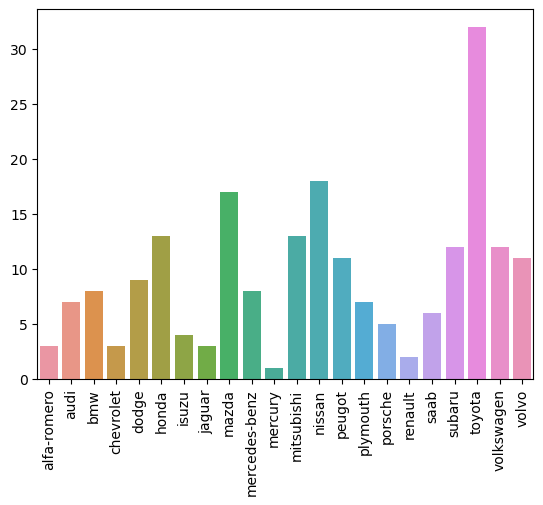

In [19]:
#Now we will be plotting some graphs to help us see
#the connections between columns and stories they can tell.
#First an obvious one is frequency of each make of car.
make_list = automobile_df['make'].unique()
make_count = [0 for _ in range(0, len(make_list))]
for i in range(0,len(automobile_df)):
    for j in range(0, len(make_list)):
               if automobile_df['make'][i] == make_list[j]:
                   make_count[j] += 1
                    
p = sns.barplot(x = make_list, y = make_count)
p.set_xticklabels(p.get_xticklabels(), rotation=90)

Findings, Toyota's are far and away the most common make of car in the dataset. And the top 6 are all Japanese makes with Volkswagen tied for 6th most common with Subaru.

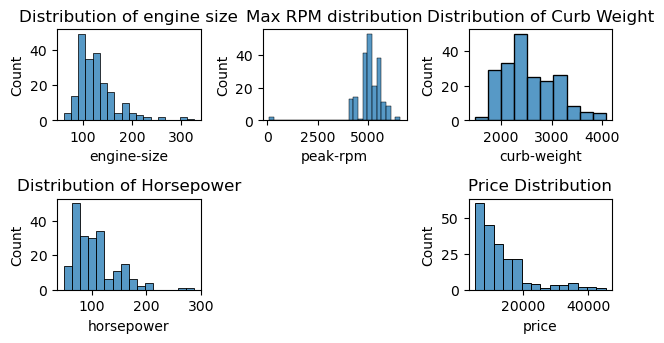

In [20]:
plt.figure(1)
plt.subplot(331)
sns.histplot(x = 'engine-size', data  = automobile_df).set(title = 'Distribution of engine size')
plt.subplot(332)
sns.histplot(x = 'peak-rpm', data = automobile_df).set(title = 'Max RPM distribution')
plt.subplot(333)
sns.histplot(x = 'curb-weight', data = automobile_df).set(title = "Distribution of Curb Weight")
plt.subplot(334)
sns.histplot(x = 'horsepower', data = automobile_df).set(title = 'Distribution of Horsepower')
plt.subplot(336)
sns.histplot(x = 'price', data = automobile_df).set(title = 'Price Distribution')
plt.tight_layout()

Findings: 
Most cars have smaller engines, with the majority between 100-140.
Low 5000s is the most common peak-rpm value and most cars have values between 5000-6000. 
Modal curb weight is 2250-2500, most fall between 1750-2500. 
Most cars have low horsepower, between 70-120.
The price for most cars is less than 15000 and cars above this price are quite evenly distributed.

(array([], dtype=float64), [])

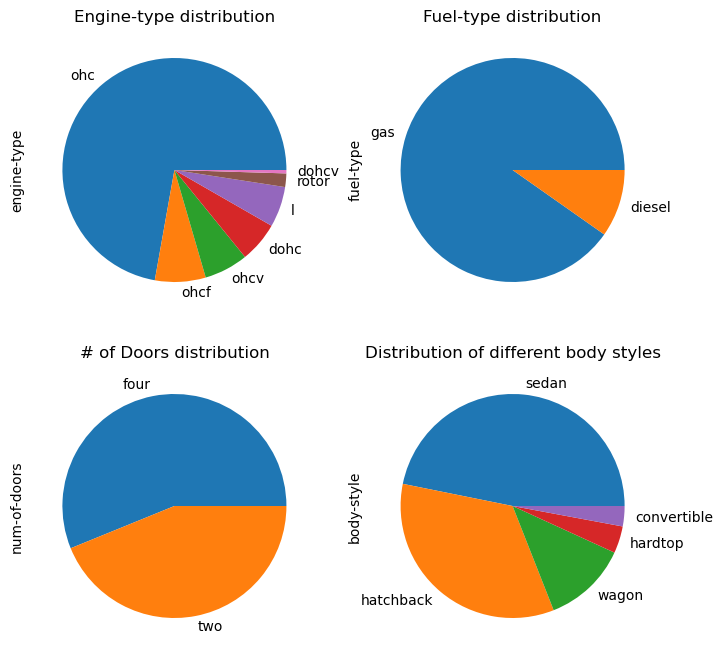

In [21]:
#Next I have plotted some more useful categories to see. 

plt.figure(1)
plt.subplot(221)
engine_count = automobile_df['engine-type'].value_counts(normalize = True)
engine_count.plot(kind = 'pie', figsize = (8,8)).set(title= 'Engine-type distribution')
plt.xticks(rotation = 30)

plt.subplot(222)
fuel_count = automobile_df['fuel-type'].value_counts(normalize = True)
fuel_count.plot(kind = 'pie').set(title = 'Fuel-type distribution')
plt.xticks(rotation = 0)

plt.subplot(223)
doors_count = automobile_df['num-of-doors'].value_counts(normalize = True)
doors_count.plot(kind = 'pie').set(title = "# of Doors distribution")
plt.xticks(rotation = 0)

plt.subplot(224)
style_count = automobile_df['body-style'].value_counts(normalize = True)
style_count.plot(kind = 'pie').set(title = 'Distribution of different body styles')
plt.xticks(rotation = 30)


Findings:
Most cars have Ohc engines. 
Four door cars are more common than two door cars. 
Sedans and hatchbacks are more common than all over types of car. 
Most cars run gas instead of diesel.

I will try to plot a heatmap set to the correlation of all columns to see which features are correlated to each other. 

<AxesSubplot:>

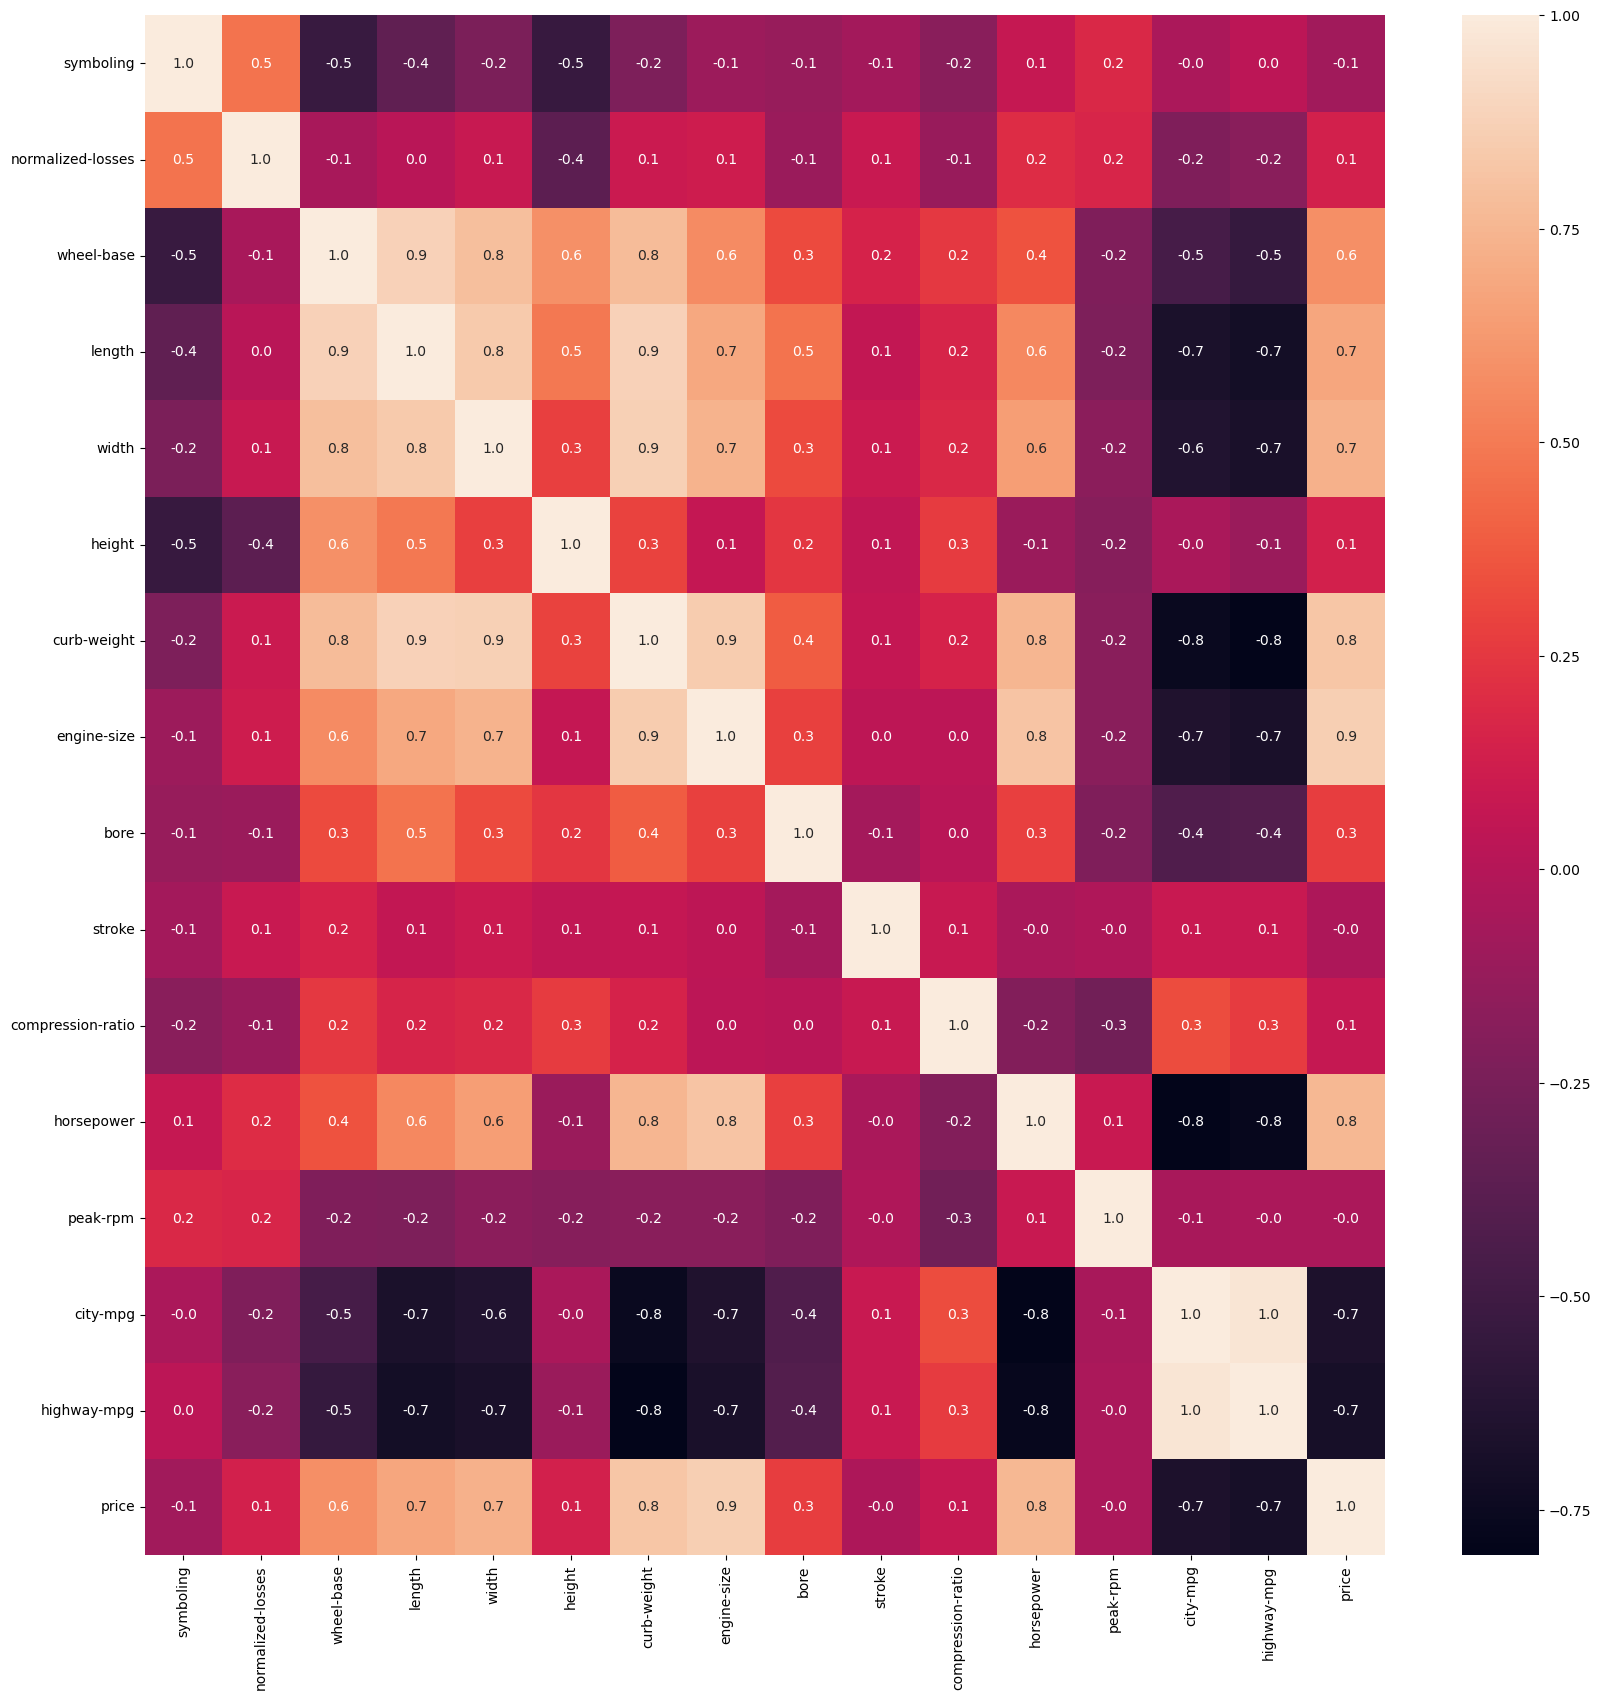

In [22]:
correlated_heat_map = automobile_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlated_heat_map, annot= True, fmt = '.1f')

In this heatmap, each cell marks two columns of the dataset. The value inside the cell (between -1 and 1) represents how correlated those two columns are. From this we can see that Horsepower is correlated to curb weight, engine size width and length. This follows logically as a bigger/heavier car will need more power to move it. It is heavily negatively correlated with both mpg columns, which also follows as bigger engines tend to use fuel more aggressively. 

Another interesting correlation is Price with the columns that describe the size of the car. As well as the horsepower and engine-size. The bigger, more powerful your car is, the more it will cost. While small compact, fuel efficient cars will cost less. 

Interestingly, Length, Height, Wheelbase are the most important factors in reducing the symboling for the car. This means that smaller, shorter cars are are lower claim risks than other cars that are otherwise similar. This also follows are your car is less likely to be damaged if it is physically smaller. 

## Bivariate Analysis
I will now start looking at how columns interact with each other.

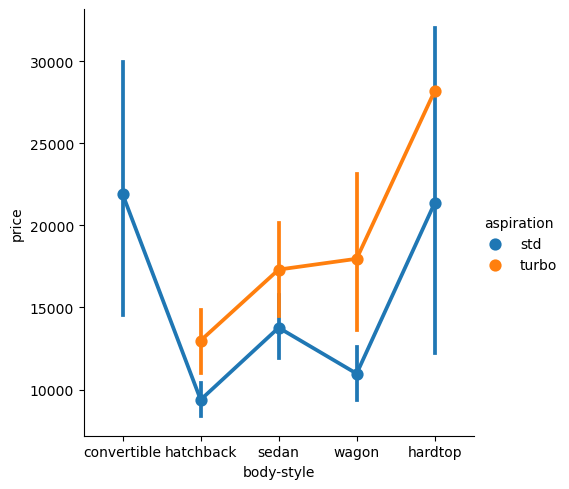

In [23]:
#Price by body-style, which types of car are expensive or cheap.
sns.catplot(x="body-style", y="price", data = automobile_df, hue="aspiration" ,kind="point")

Findings:
Cars with standard aspiration are consistently cheaper than those with turbo by about 20-30%. 
Convertible and Hardtops are more expensive than the other styles, which also aligned with the popularity of these styles too.
Cheaper body styles are also the more common/popular ones.

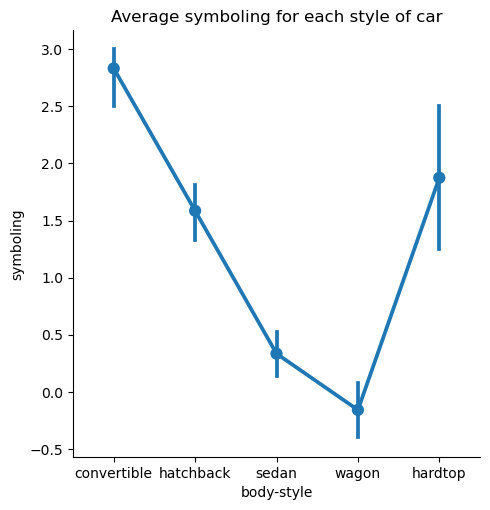

In [24]:
sns.catplot(x = 'body-style', y = 'symboling', data  = automobile_df, kind = 'point').set(title = 'Average symboling for each style of car')
plt.show()

In [25]:
Findings: covertibles, hatchbacks and hardtops 

SyntaxError: invalid syntax (787125340.py, line 1)

<AxesSubplot:xlabel='body-style', ylabel='horsepower'>

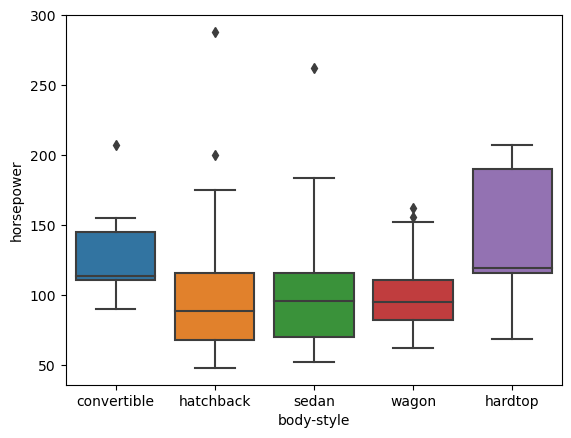

In [26]:
sns.boxplot(x = 'body-style', y= 'horsepower', data = automobile_df)

[Text(0, 0, 'alfa-romero'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'mercedes-benz'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

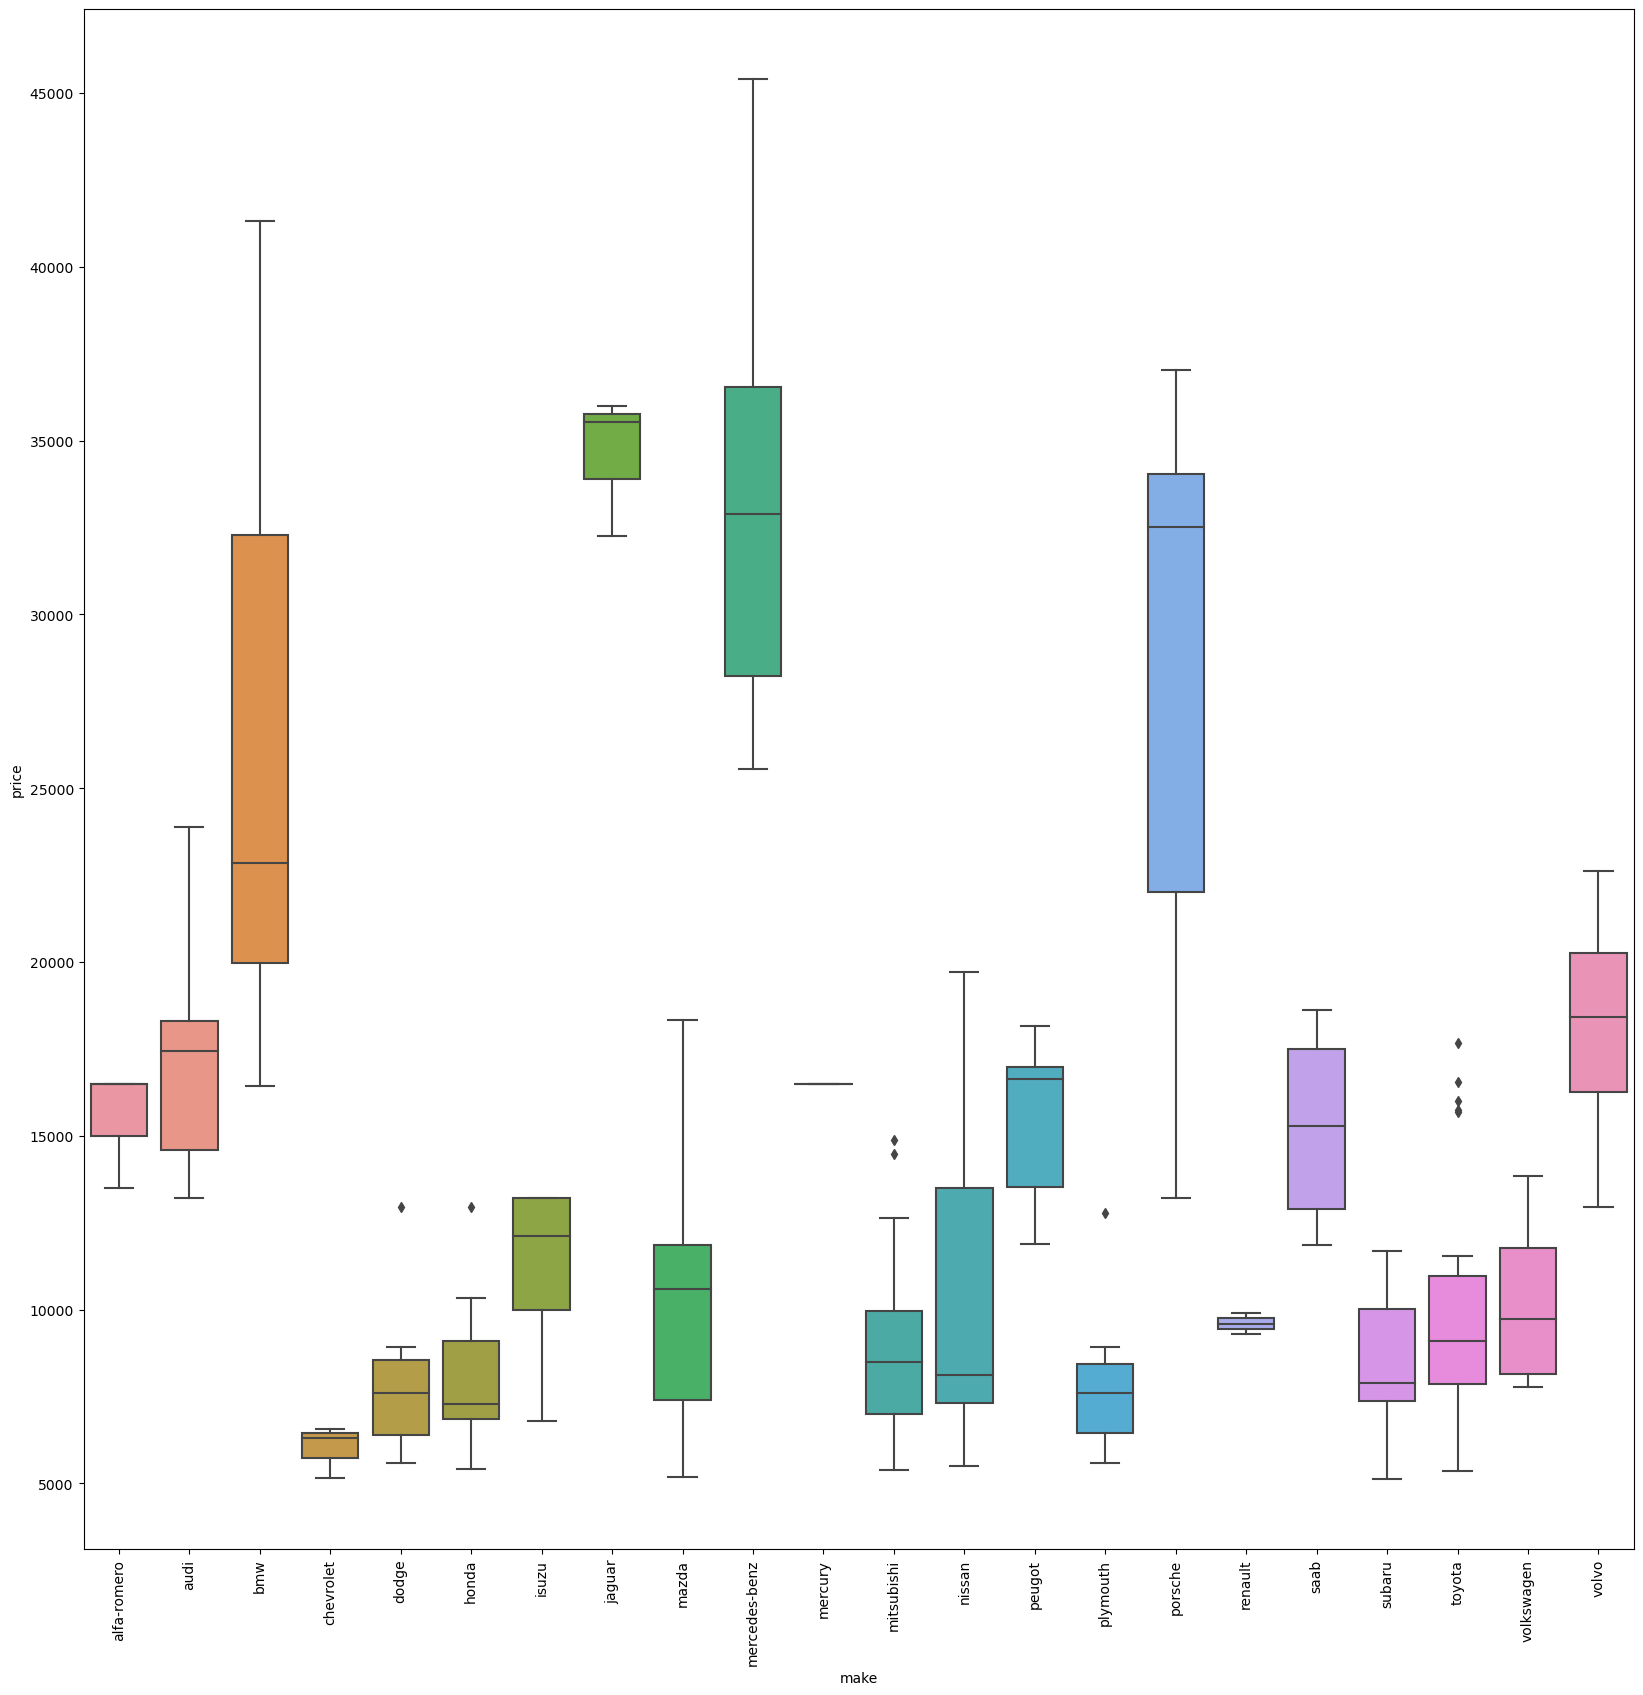

In [27]:
#Price analysis by manufacturer.
#plotting this as is is too small and cramped, so I will increase the plot size.
plt.figure(figsize = (20,20))
p = sns.boxplot(x = 'make', y = 'price', data = automobile_df)
p.set_xticklabels(p.get_xticklabels(), rotation=90)

Findings: bmw, mercedes-benz and porsche have the largest ranges in price, but also very high mean prices. 
The most popular cars (Toyota, Nissan, Mazda, Mitsubishi, subaru, and volkswagen) are all found in lower price points.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

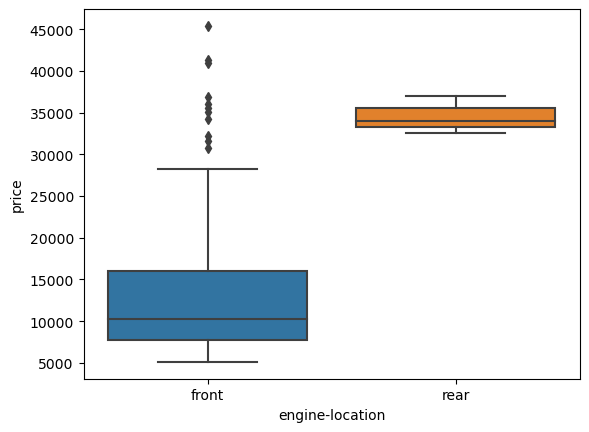

In [28]:
#Price by Engine location
sns.boxplot(x="engine-location", y="price", data=automobile_df)

Findings:
Only high-price point cars have an engine located in the rear of the car, while front-located engines are common mostly at low price points but also present at all pricepoints.

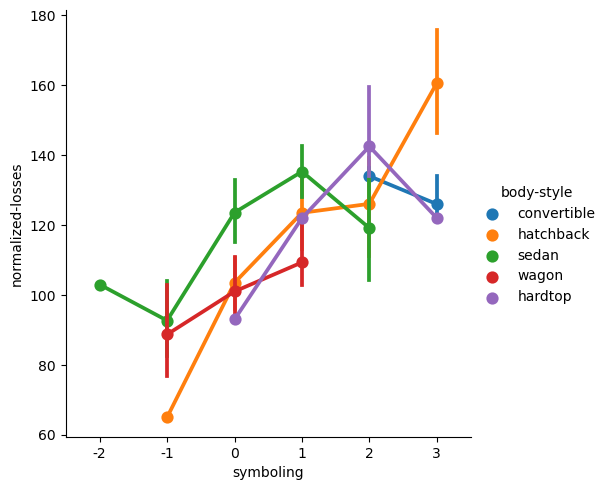

In [29]:
sns.catplot(data=automobile_df, x="symboling", y="normalized-losses",  hue="body-style", kind = 'point')


<AxesSubplot:xlabel='num-of-doors', ylabel='symboling'>

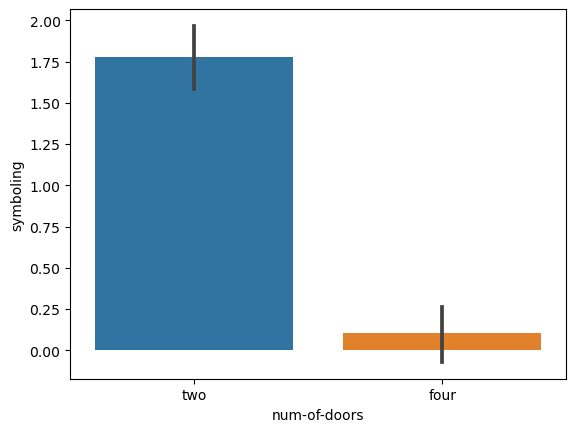

In [30]:
sns.barplot(x = 'num-of-doors', y = 'symboling', data = automobile_df)

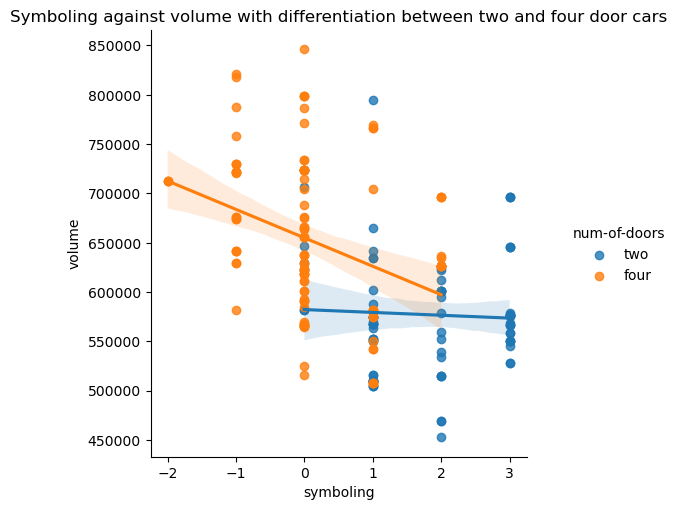

In [31]:
automobile_df['volume'] = (automobile_df['height'] * automobile_df['width'] * automobile_df['length'])
sns.lmplot(x = 'symboling', y = 'volume', hue = 'num-of-doors', data = automobile_df).set(title = 'Symboling against volume with differentiation between two and four door cars')